### K-Mean Clustering - Customer Segmentation

Load Dataset and Visualization

In [5]:
import pandas as pd

# Load dataset
df_data = pd.read_csv('../datasets/Mall_Customers.csv')

# Load feature Annual Income and Spending Score from the dataset
X = df_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

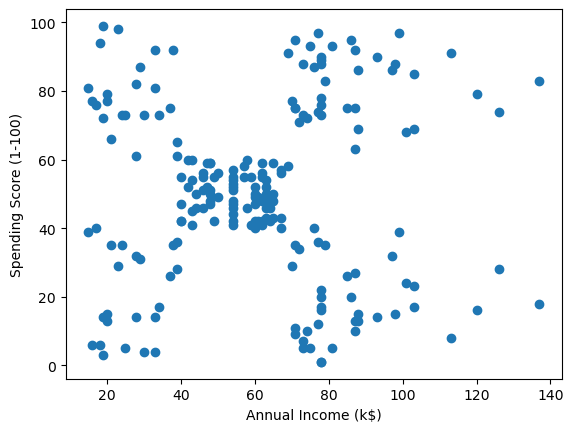

In [7]:
from matplotlib import pyplot as plt

# Plot scatter plot
plt.scatter(df_data['Annual Income (k$)'], df_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Build K-Mean Model

In [8]:
from sklearn.cluster import KMeans

# Initialize KMeans: 5 clusters, 'k-means++' initialization, reproducible with random_state
kmeansModel = KMeans(
    n_clusters=5, 
    init='k-means++', 
    random_state=42
)

# Fit the model to the data
kmeansModel.fit(X)

# Predict cluster labels for each customer
clusters_pred = kmeansModel.predict(X)


In [9]:
# Sum of squared distances of samples to their closest cluster center
print(kmeansModel.inertia_)

44448.45544793369


In [10]:
# Coordinates of the K = 5 centroids
print(kmeansModel.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


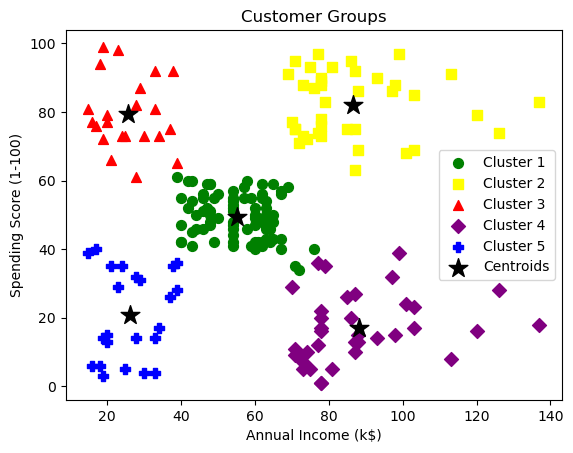

In [13]:
import matplotlib.pyplot as plt

# Plot each cluster with a unique color & marker
plt.scatter(X[clusters_pred == 0, 0], X[clusters_pred == 0, 1],
            s=50, c='green',  marker='o', label='Cluster 1')
plt.scatter(X[clusters_pred == 1, 0], X[clusters_pred == 1, 1],
            s=50, c='yellow', marker='s', label='Cluster 2')
plt.scatter(X[clusters_pred == 2, 0], X[clusters_pred == 2, 1],
            s=50, c='red',    marker='^', label='Cluster 3')
plt.scatter(X[clusters_pred == 3, 0], X[clusters_pred == 3, 1],
            s=50, c='purple', marker='D', label='Cluster 4')
plt.scatter(X[clusters_pred == 4, 0], X[clusters_pred == 4, 1],
            s=50, c='blue',   marker='P', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeansModel.cluster_centers_[:, 0],
            kmeansModel.cluster_centers_[:, 1],
            s=200, c='black', marker='*', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Find Optimal K Value Using Elbow Method

In [21]:
# Compute inertia for different values of K
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)
    print(f"K value {k} inertias = ", model.inertia_)

K value 1 inertias =  269981.28000000014
K value 2 inertias =  183653.3289473683
K value 3 inertias =  106348.37306211119
K value 4 inertias =  73880.64496247198
K value 5 inertias =  44448.45544793369
K value 6 inertias =  40825.16946386947
K value 7 inertias =  33642.57922077922
K value 8 inertias =  26686.837785187785
K value 9 inertias =  24766.471609793436
K value 10 inertias =  23103.122085983905


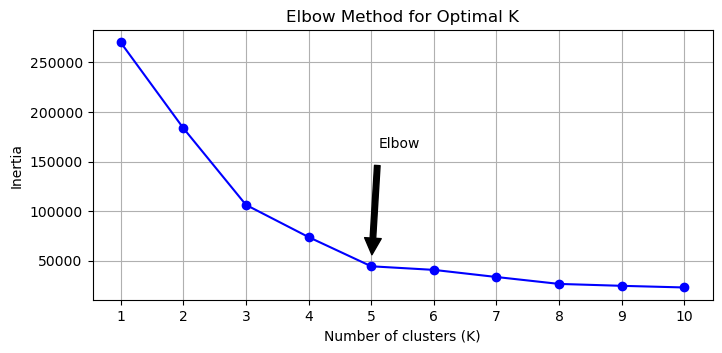

In [22]:
import matplotlib.pyplot as plt

# Visually find the sweet spot of k value
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.annotate(
    'Elbow',
    xy=(5, inertias[4]),
    xytext=(5, 85),
    textcoords='offset points',
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.grid(True)
plt.show()


### Dimentionality Reduction

##### Principal Component Analysis (PCA)

Practise 1: Visualizing Handwritten Digits using PCA

In [23]:
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)  # → (1797, 64)

(1797, 64)


<Figure size 640x480 with 0 Axes>

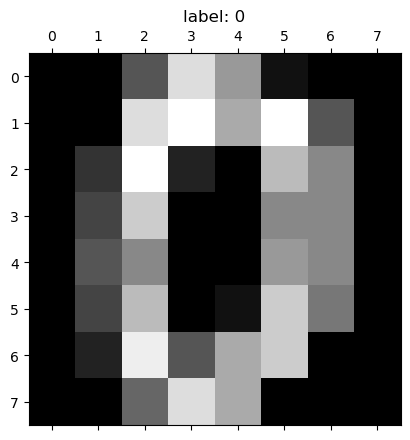

In [25]:
import matplotlib.pyplot as plt

index = 0   # Print first sample
plt.gray()
plt.matshow(X[index].reshape(8, 8))
plt.title(f'label: {y[index]}')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print('Shape of training set X:', X_train.shape)
print('Shape of testing set X:',  X_test.shape)

Shape of training set X: (1257, 64)
Shape of testing set X: (540, 64)


In [28]:
from sklearn.decomposition import PCA

# Initialize PCA: keep 2 components to project into 2D
pca = PCA(n_components=2)

# Fit PCA on the training data and transform it
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.transform(X_test)    # Use the transform() method to map the test data into the principal‐component space previously fitted on the training set

print('PCA variance ratio:', pca.explained_variance_ratio_)
print('PCA variances     :', pca.explained_variance_)

PCA variance ratio: [0.14870031 0.13631282]
PCA variances     : [178.94164948 164.03490507]


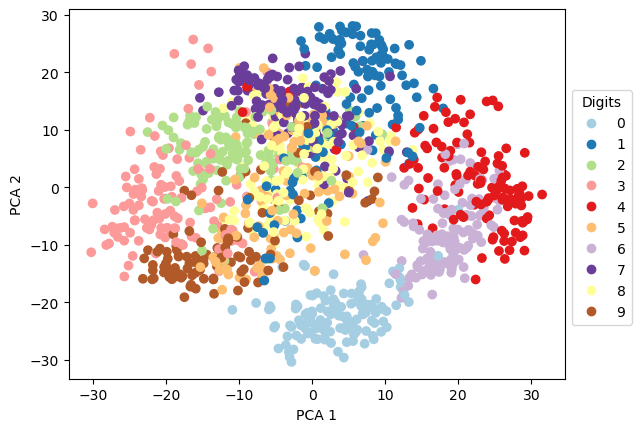

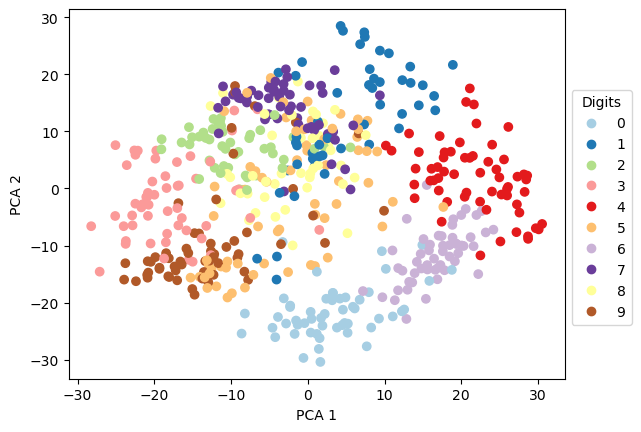

In [30]:
import matplotlib.pyplot as plt

scatter = plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.legend(*scatter.legend_elements(), title='Digits', bbox_to_anchor=(1, 0.8))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

scatter = plt.scatter(test_reduced[:, 0], test_reduced[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.legend(*scatter.legend_elements(), title='Digits', bbox_to_anchor=(1, 0.8))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

##### Distributed Stochastic Neighbor Embedding (t-SNE)

Practise 2: Visualizing Handwritten Digits using t-SNE

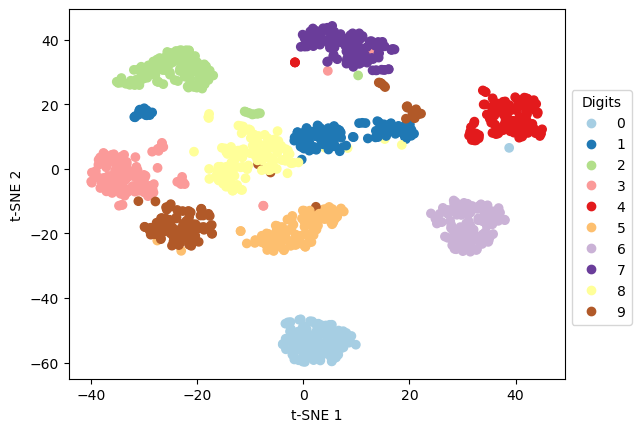

In [31]:
from sklearn.manifold import TSNE

# Dimension reduction using t-SNE
train_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_train)

# Visualize the result
scatter = plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, cmap=plt.cm.Paired)

plt.legend(*scatter.legend_elements(), title='Digits', bbox_to_anchor=(1, 0.8))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()